In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature as cf
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from datetime import timedelta
from shapely.ops import unary_union
from shapely.prepared import prep
import pandas as pd
import calendar
import subprocess

import dataset
from config import main_path_era
from id_selector import IDSelector
#import dlfront_style

from config import us_states_location, main_path_era, savefig_path
import visualize

In [3]:
STATES = visualize.create_STATES(us_states_location)

In [4]:
class_ids = IDSelector(main_path = main_path_era, 
                       start_year = 2004, 
                       end_year = 2016, 
                       month_only=[6], year_only=[2004], mcs_only=True, 
                       percent_train=0.7)

# here we generate the list of IDs by loading from a presaved dictionary
IDlist = class_ids.generate_IDarray(dict_freq='3H')

starting ID generation...
ID generation complete.


In [5]:
INDEX = 5

## Figures for the ML architecture plot (AGU2020)

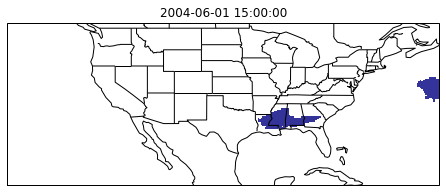

In [24]:
variable = 'cloudtracknumber'   # mask

#for enum, number in enumerate(np.repeat(np.arange(747,760,1),2)):

ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/mask/mask_{variable}_ID{str(IDlist[INDEX])}.nc')
fig = plt.figure(figsize=(6.,4.))
ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
ax.pcolormesh(ds.where(ds[variable]==0,1)['lon'].values,
              ds.where(ds[variable]==0,1)['lat'].values,
              ds.where(ds[variable]==0,1)[variable].values,
              vmin=0, vmax=1, cmap='terrain_r')
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.add_feature(cf.BORDERS)
ax.margins(x=0, y=0)
ax.coastlines()
ax.set_title(pd.to_datetime(ds['time'].values))
#plt.savefig(f"{savefig_path}mcs_era5_{enum+1}.png", bbox_inches='tight', dpi=200)
plt.show()
# plt.close()

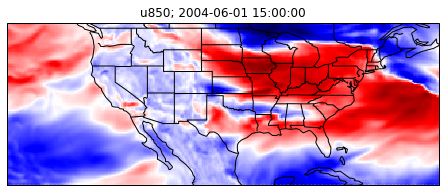

In [25]:
variable = 'U' # temperature at 2m

ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/u850/file_u850_ID{str(IDlist[INDEX])}.nc')
fig = plt.figure(figsize=(6.,4.))
ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
ax.pcolormesh(ds['longitude'].values,
              ds['latitude'].values,
              ds[variable].values,
              transform=ccrs.PlateCarree(), 
              cmap='seismic')
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.add_feature(cf.BORDERS)
ax.margins(x=0, y=0)
ax.coastlines()
ax.set_title('u850; '+str(pd.to_datetime(ds['time'].values)))
# plt.savefig(f"{savefig_path}mcs_dl2t.svg", bbox_inches='tight', dpi=200)
plt.show()
# plt.close()

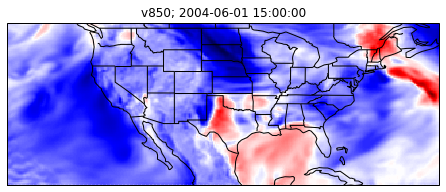

In [26]:
variable = 'V' # temperature at 2m

ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/v850/file_v850_ID{str(IDlist[INDEX])}.nc')
fig = plt.figure(figsize=(6.,4.))
ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
ax.pcolormesh(ds['longitude'].values,
              ds['latitude'].values,
              ds[variable].values,
              transform=ccrs.PlateCarree(), 
              cmap='seismic')
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.add_feature(cf.BORDERS)
ax.margins(x=0, y=0)
ax.coastlines()
ax.set_title('v850; '+str(pd.to_datetime(ds['time'].values)))
# plt.savefig(f"{savefig_path}mcs_dl2t.svg", bbox_inches='tight', dpi=200)
plt.show()
# plt.close()

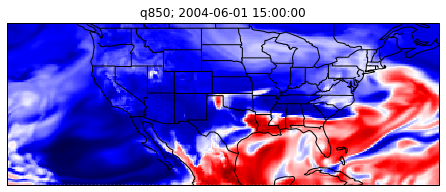

In [27]:
variable = 'Q' # temperature at 2m

ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/q850/file_q850_ID{str(IDlist[INDEX])}.nc')
fig = plt.figure(figsize=(6.,4.))
ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
ax.pcolormesh(ds['longitude'].values,
              ds['latitude'].values,
              ds[variable].values,
              transform=ccrs.PlateCarree(), 
              cmap='seismic')
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.add_feature(cf.BORDERS)
ax.margins(x=0, y=0)
ax.coastlines()
ax.set_title('q850; '+str(pd.to_datetime(ds['time'].values)))
# plt.savefig(f"{savefig_path}mcs_dl2t.svg", bbox_inches='tight', dpi=200)
plt.show()
# plt.close()

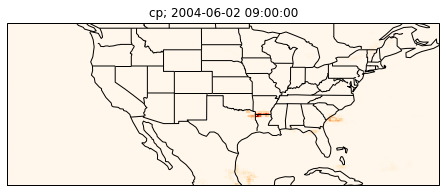

In [22]:
variable = 'CP' # temperature at 2m

ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/cp/file_cp_ID{str(IDlist[INDEX])}.nc')
fig = plt.figure(figsize=(6.,4.))
ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
ax.pcolormesh(ds['longitude'].values,
              ds['latitude'].values,
              ds[variable].values,
              transform=ccrs.PlateCarree(), 
              cmap='OrRd')
ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
ax.add_feature(cf.BORDERS)
ax.margins(x=0, y=0)
ax.coastlines()
ax.set_title('cp; '+str(pd.to_datetime(ds['time'].values)))
# plt.savefig(f"{savefig_path}mcs_dl2t.svg", bbox_inches='tight', dpi=200)
plt.show()
# plt.close()

## Figures for the MCS gif (AGU2020)

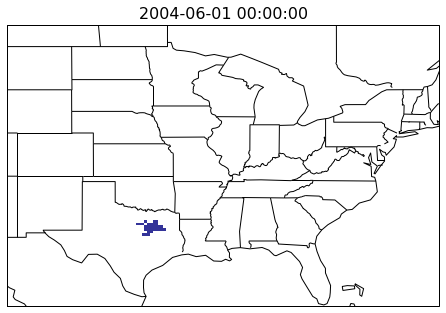

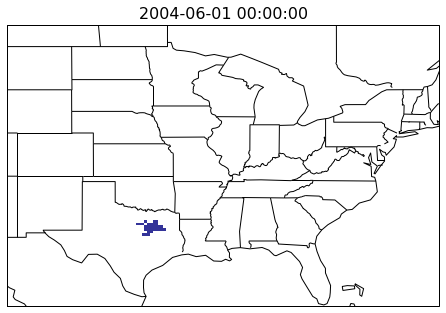

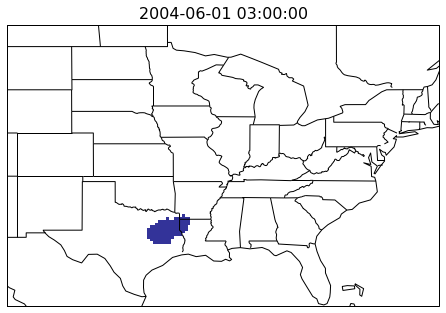

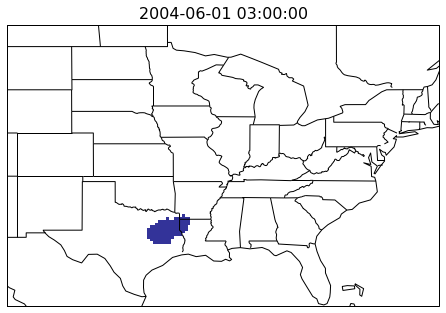

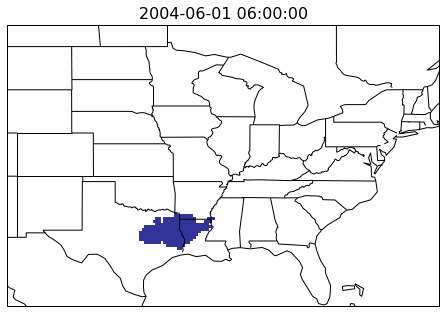

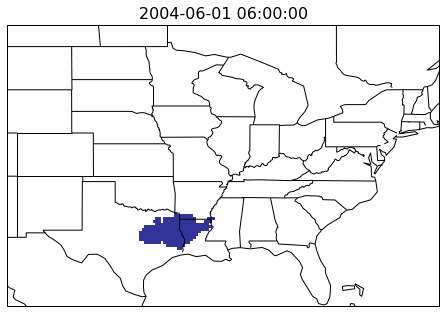

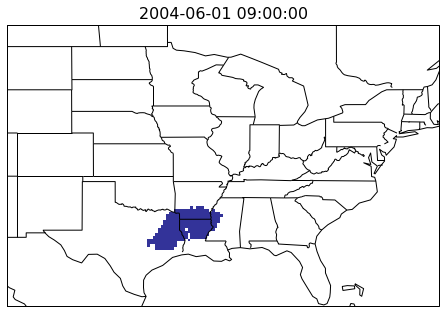

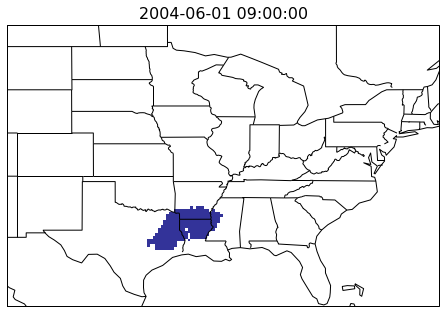

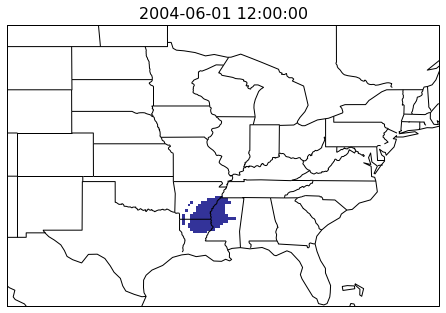

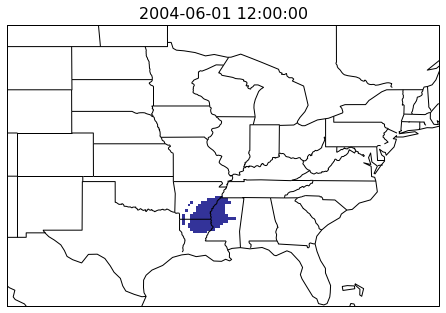

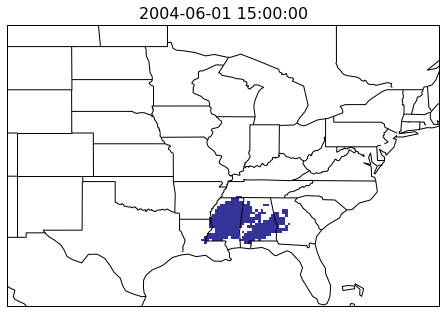

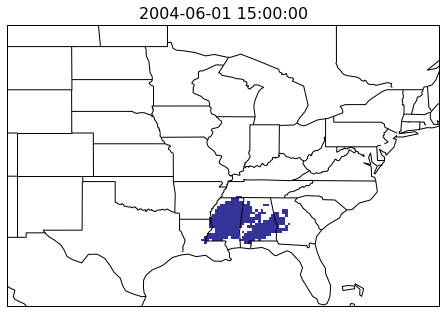

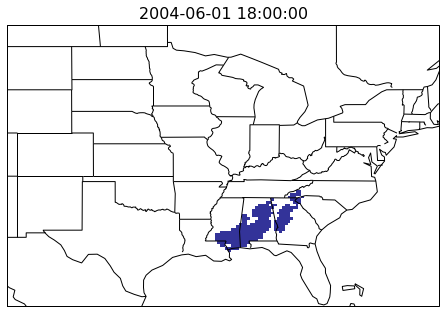

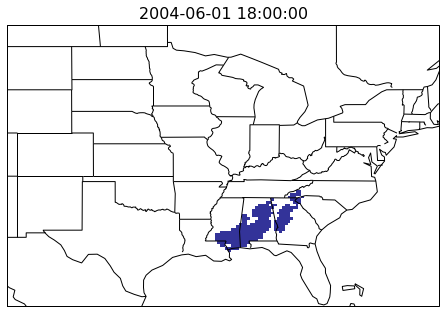

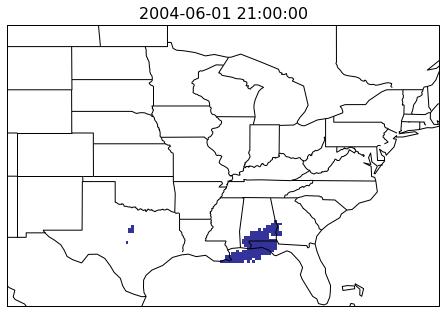

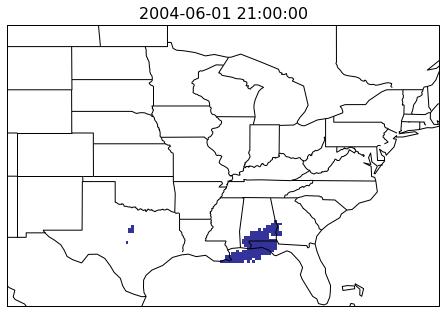

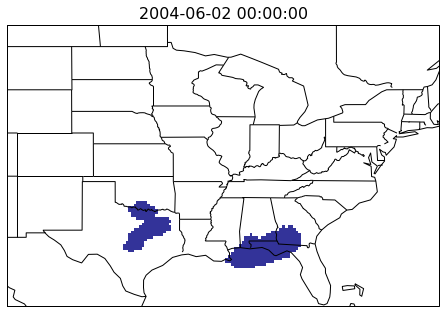

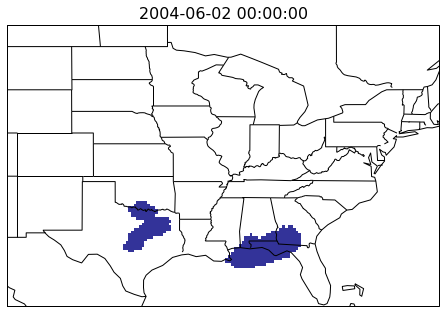

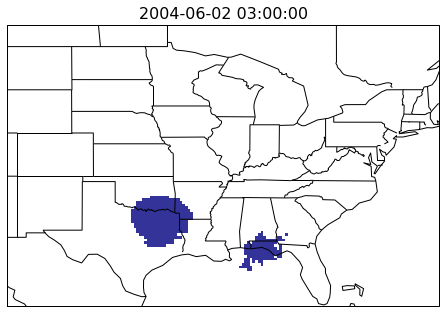

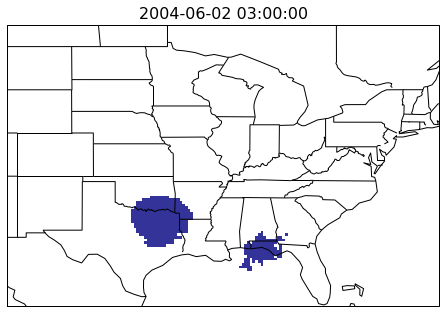

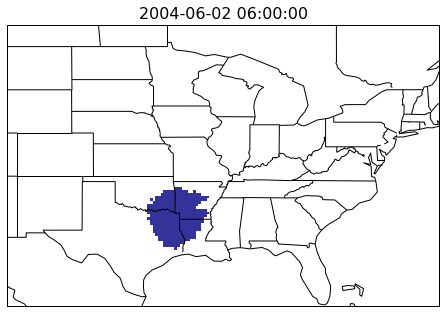

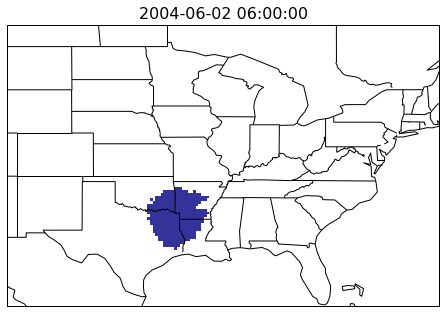

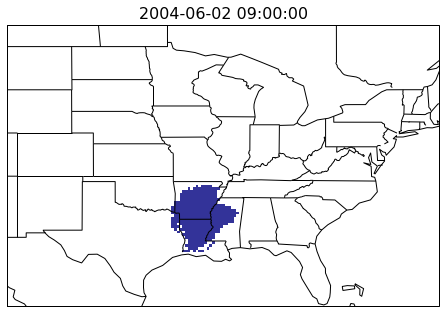

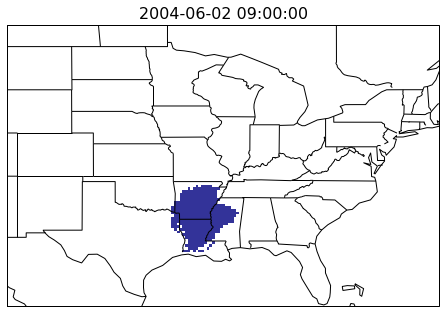

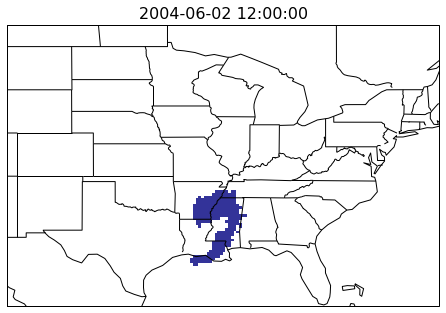

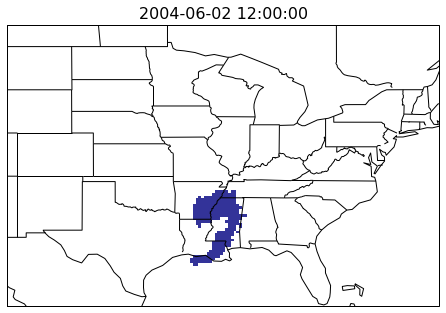

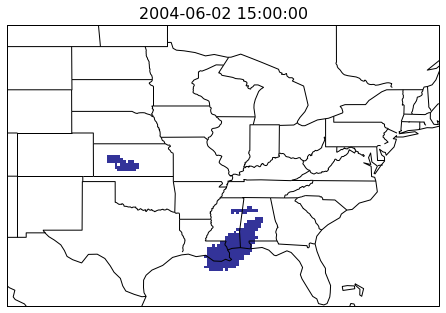

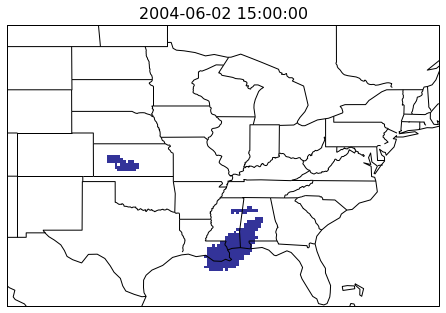

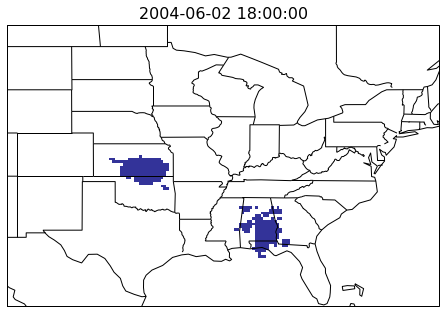

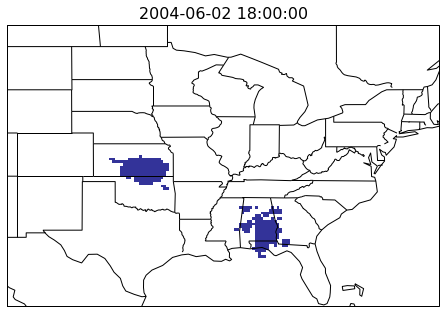

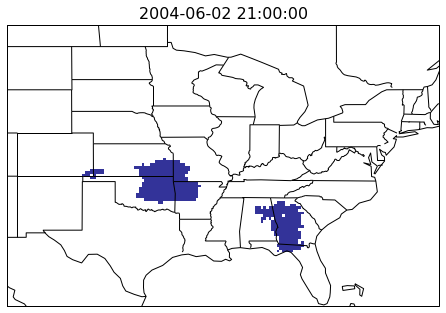

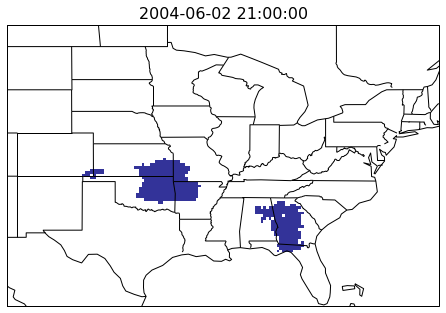

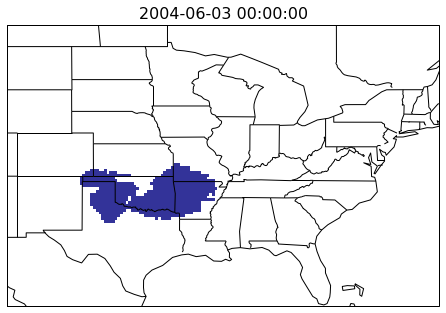

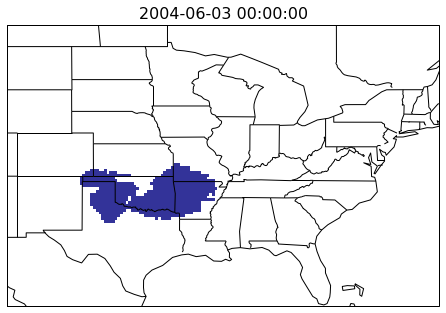

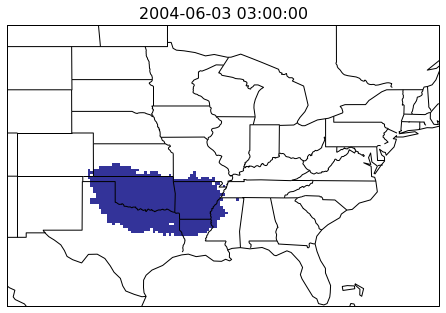

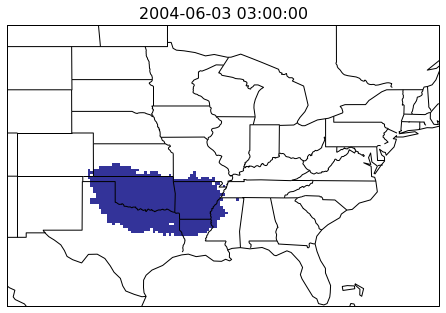

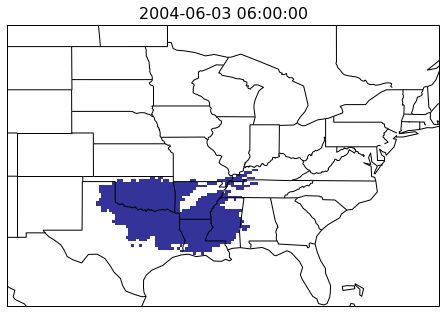

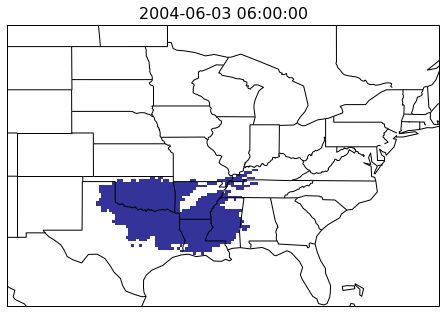

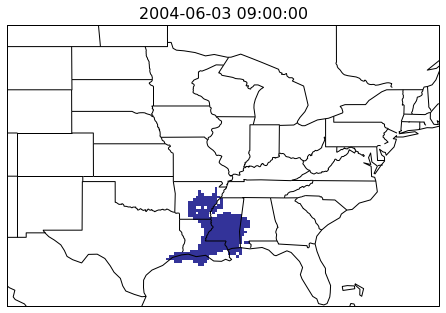

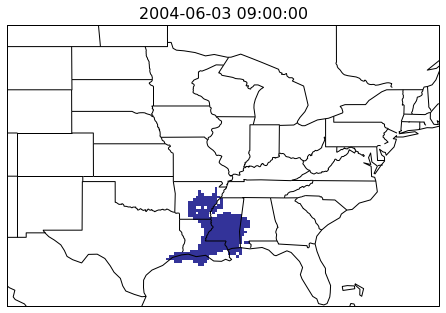

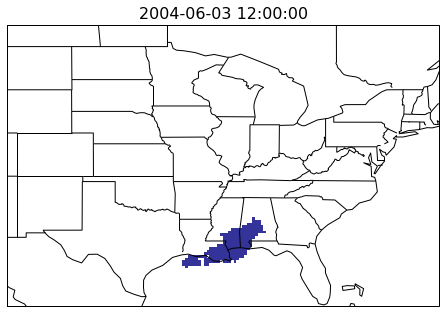

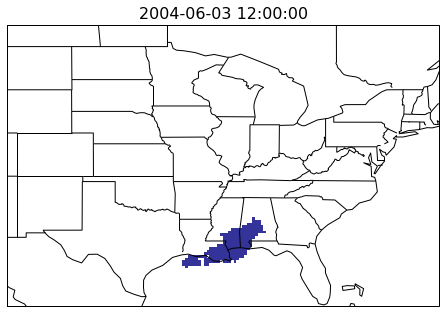

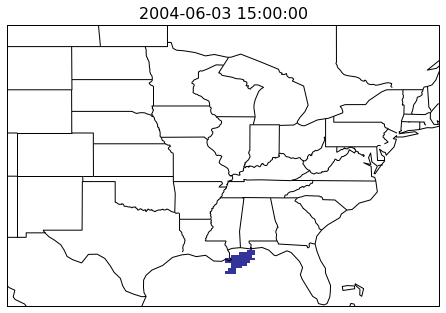

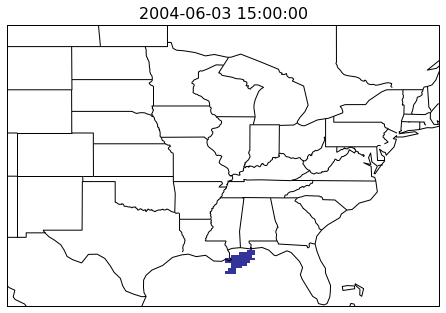

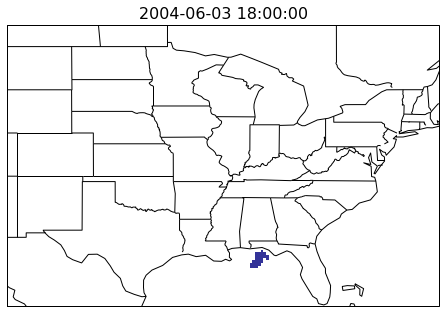

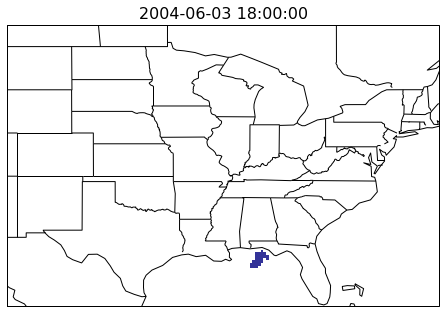

In [81]:
variable = 'cloudtracknumber'
for en, id_ in enumerate(np.repeat(IDlist[:23],2)):
    ds = xr.open_dataset(f'{main_path_era}/dl_files/3H/mask_{variable}_ID{id_}.nc')
    fig = plt.figure(figsize=(6.,4.))
    ax = plt.axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
    ax.pcolormesh(ds.where(ds[variable]==0,1).isel(time=0)['lon'].values,
                  ds.where(ds[variable]==0,1).isel(time=0)['lat'].values,
                  ds.where(ds[variable]==0,1).isel(time=0)[variable].values,
                  transform=ccrs.PlateCarree(), 
                  vmin=0, vmax=1, cmap='terrain_r')
    ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
    ax.add_feature(cf.BORDERS)
    ax.margins(x=0, y=0)
    ax.coastlines()
    ax.set_title(ds['time'].dt.strftime("%Y-%m-%d %H:%M:00").values[0], 
                 fontsize=16)
    plt.savefig(f"/glade/work/molina/DATA/temp_figs/mcs_{en}.png", bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()

In [ ]:
def grid2gif(image_str, output_gif):
    """
    Create a gif using stitched images.
    
    Args:
        image_str (str): String of images and file saved location.
        output_gif (str): String of gif name and file save location.
    """
    str1 = 'convert -delay 8 -loop 0 ' + image_str  + ' ' + output_gif
    subprocess.call(str1, shell=True)
    
#grid2gif('/glade/work/molina/DATA/temp_figs/mcs_era5_{1..26}.png', '/glade/work/molina/DATA/temp_figs/mcs_era5.gif')

In [86]:
visualize.grid2gif("/glade/work/molina/DATA/temp_figs/mcs_{0..45}.png", "/glade/work/molina/DATA/temp_figs/mcs_imerg.gif")

In [40]:
def create_quad_plot(data_mask, time_indx, hght_indx, 
                     data1, data2, data3, variable1='Q', variable2='U', variable3='V', 
                     STATES=STATES, savefig=False):
    """
    Visualize four plots at once.
    """
    fig = plt.figure(figsize=(11.,8.))
    
    ax = plt.axes([0.,0.5,0.5,0.5], projection=ccrs.PlateCarree())
    data_mask.binary_tag.isel(time=time_indx).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap='Reds')
    ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
    ax.add_feature(cf.BORDERS)
    ax.margins(x=0,y=0)
    ax.coastlines()
    
    ax = plt.axes([0.5,0.5,0.5,0.5], projection=ccrs.PlateCarree())
    data1.isel(
               ncl4=time_indx,
               ncl5=hght_indx,
               ncl6=slice(np.where(data1.lat.values==data_mask.lat[0].values)[0][0],
                          np.where(data1.lat.values==data_mask.lat[-1].values)[0][0]+1),
               ncl7=slice(np.where(data1.lon.values==data_mask.lon[0].values)[0][0],
                          np.where(data1.lon.values==data_mask.lon[-1].values)[0][0]+1))[variable1].plot.pcolormesh(
        vmin=0, vmax=0.0035, cmap='viridis', cbar_kwargs={'extend':'neither'})
    ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
    ax.add_feature(cf.BORDERS)
    ax.margins(x=0,y=0)
    ax.coastlines()
    
    ax = plt.axes([0.,0.,0.5,0.5], projection=ccrs.PlateCarree())
    data2.isel(
               ncl4=time_indx,
               ncl5=hght_indx,
               ncl6=slice(np.where(data2.lat.values==data_mask.lat[0].values)[0][0],
                          np.where(data2.lat.values==data_mask.lat[-1].values)[0][0]+1),
               ncl7=slice(np.where(data2.lon.values==data_mask.lon[0].values)[0][0],
                          np.where(data2.lon.values==data_mask.lon[-1].values)[0][0]+1))[variable2].plot.pcolormesh(
        vmin=-30, vmax=30, cmap='plasma', cbar_kwargs={'extend':'neither'})
    ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
    ax.add_feature(cf.BORDERS)
    ax.margins(x=0,y=0)
    ax.coastlines()
    
    ax = plt.axes([0.5,0.,0.5,0.5], projection=ccrs.PlateCarree())
    data3.isel(
               ncl4=time_indx,
               ncl5=hght_indx,
               ncl6=slice(np.where(data3.lat.values==data_mask.lat[0].values)[0][0],
                          np.where(data3.lat.values==data_mask.lat[-1].values)[0][0]+1),
               ncl7=slice(np.where(data3.lon.values==data_mask.lon[0].values)[0][0],
                          np.where(data3.lon.values==data_mask.lon[-1].values)[0][0]+1))[variable3].plot.pcolormesh(
        vmin=-20, vmax=20, cmap='twilight_shifted', cbar_kwargs={'extend':'neither'})
    ax.add_feature(STATES, facecolor='none', edgecolor='k', zorder=30)
    ax.add_feature(cf.BORDERS)
    ax.margins(x=0,y=0)
    ax.coastlines()
    
    if not savefig:
        return plt.show()
    if savefig:
        plt.savefig(f"/glade/work/molina/DATA/temp_figs/mcsquad_{time_indx}.png", bbox_inches='tight', dpi=200)
        plt.close()